### Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle.   


###### Link: https://www.kaggle.com/giripujar/hr-analytics


### First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

## Import all required packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
from google.colab import drive
drive.mount('/content/drive')
path_HR='/content/drive/MyDrive/MachineLearning/HR_comma_sep.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = pd.read_csv(path_HR)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df.ndim

2

In [23]:
df.shape

(14999, 10)

In [24]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [25]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [28]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [29]:
df.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [30]:
df.notna().sum()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

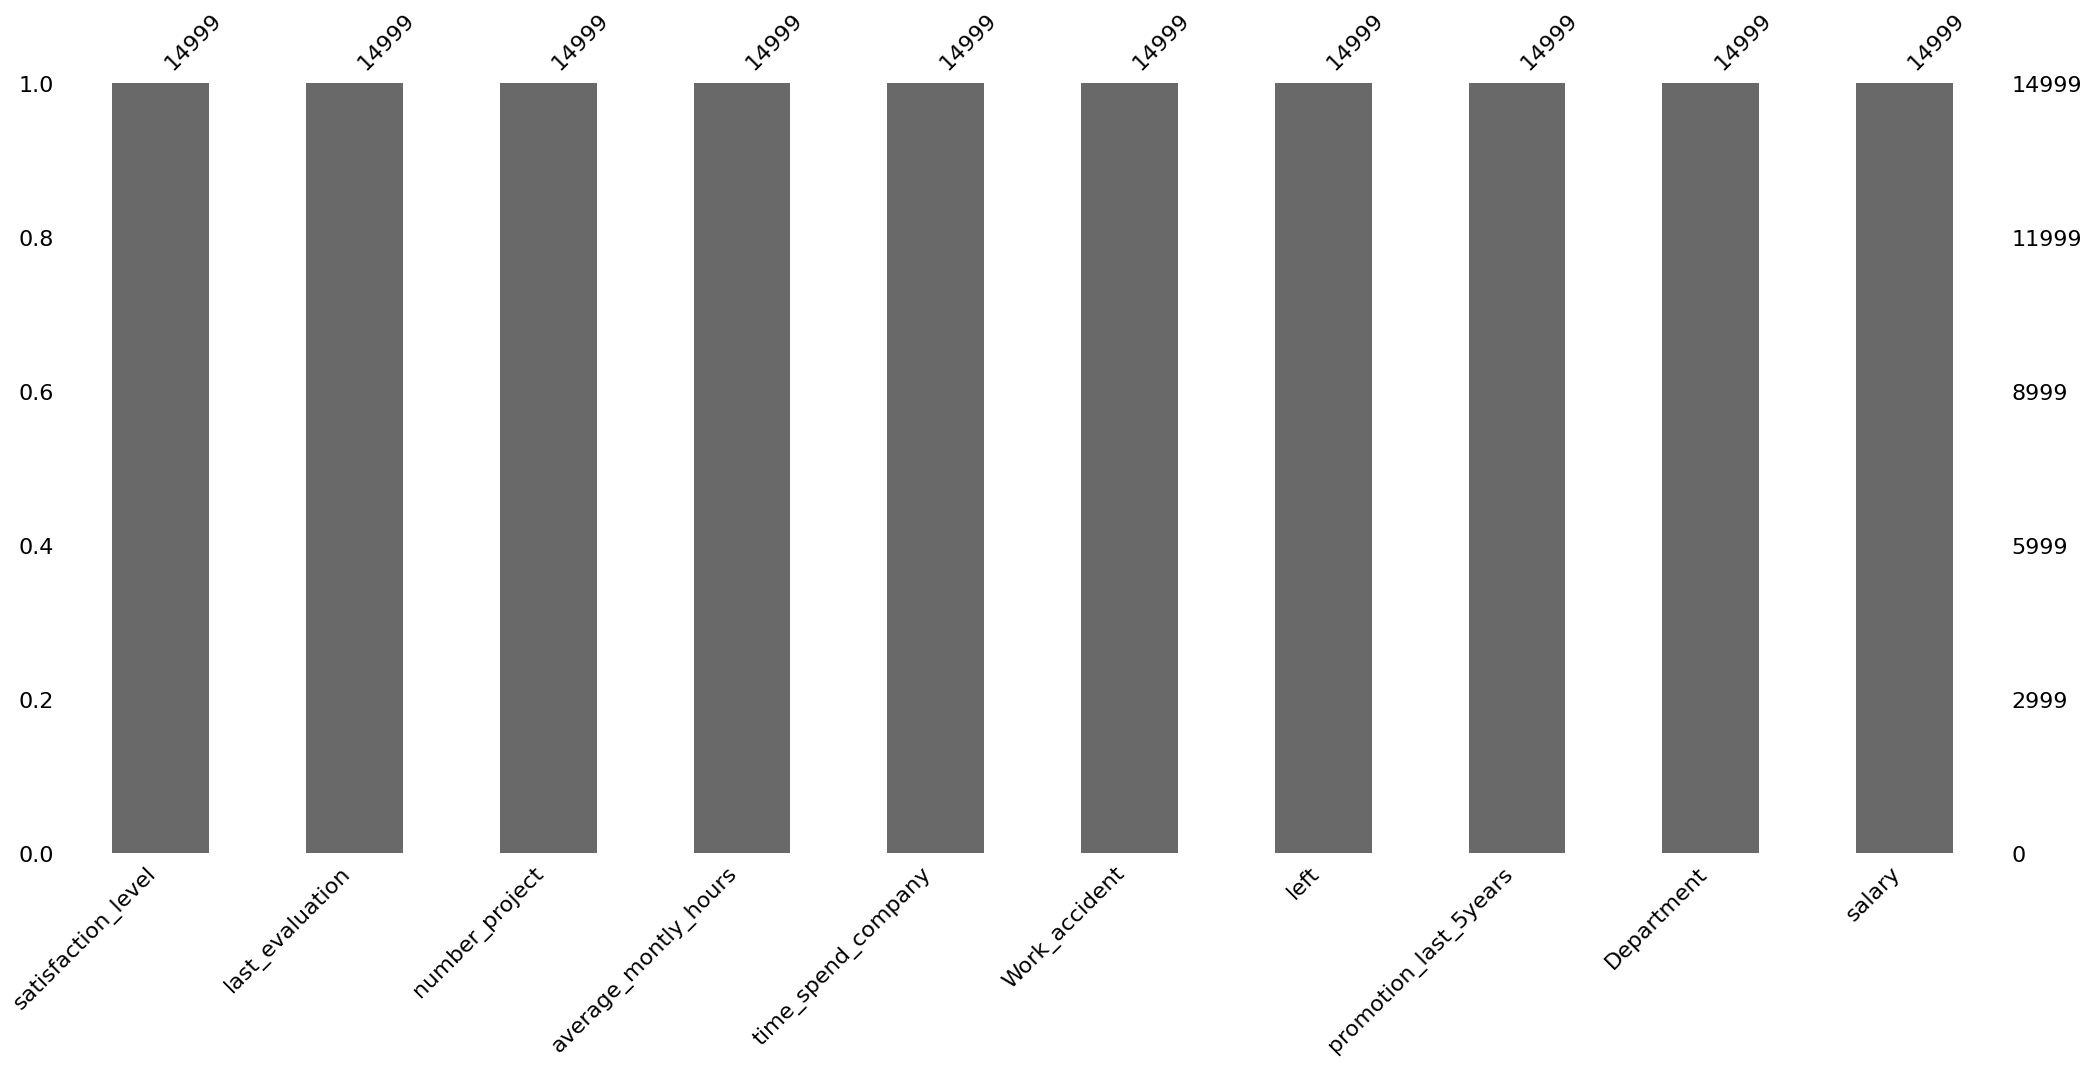

In [31]:
import missingno as msno
msno.bar(df)
plt.show()

In [32]:
df.left.value_counts()


left
0    11428
1     3571
Name: count, dtype: int64

In [33]:
df.left.value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [34]:
df.groupby('left').mean()

TypeError: Could not convert salessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingmarketingmarketingmarketingmarketingmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITITITmarketingaccountingaccountingITITmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITmanagementmanagementmanagementmanagementmanagementmarketingITtechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITITITmarketingaccountingaccountingITITmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITmanagementmanagementmanagementmanagementmanagementmarketingIT to numeric

In [ ]:
df.groupby('left').var()


In [ ]:
df.groupby('left').std()

## Data Visualization

In [ ]:
 plt.figure(figsize=(14,6))
sns.countplot(df['Department'],hue=df['left'],data=df, palette="Set3")
plt.show()

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(y='average_montly_hours', x='Department', hue= 'left',data=df,palette="Set3")
plt.show()


In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.satisfaction_level, kde=False, color="y", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

sns.distplot(df.last_evaluation, kde=False, color="b", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

sns.distplot(df.average_montly_hours, kde=False, color="r", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

In [ ]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary Turnover Distribution');

In [ ]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="Department", hue='left', data=df).set_title('Employee Department Turnover Distribution');

In [ ]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='green',shade=True)
ax=sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='black',shade=True)
plt.title('Employee Evaluation Distribution Left vs retained')

In [ ]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='red',shade=True)
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='black',shade=True )
plt.title('Employee Evaluation Distribution Left vs retained')

In [ ]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'] , color='b',shade=True )
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='black',shade=True )
plt.title('Employee Evaluation Distribution Left vs retained')

In [ ]:
sns.pairplot(df, hue='left',height=4.5)
plt.show()


## Data Preprocessing

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True ,cmap="YlGn")

In [ ]:
data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data.head()

In [ ]:
salary = pd.get_dummies(data['salary'], prefix='salary')
salary

In [ ]:
new_df = pd.concat([data,salary],axis=1)
new_df

In [ ]:
new_df.drop(['salary','salary_2'], axis=1, inplace=True)
new_df

In [ ]:
X = new_df.copy()
X

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')
y=df["left"]
y

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0])
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['left']].sort_values(by='left',ascending=False),
vmin=-1, vmax=1, annot=True,ax=ax[1])
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':14}, pad=16);

## Data Modeling using Logistic Regression

In [ ]:
 from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassPredictionError

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 42)


In [ ]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
lr = LogisticRegression(penalty='l2', solver = 'liblinear', random_state=45)
lr_clf = Pipeline([('standardize', scaler),
('log_reg', lr)])


In [ ]:
lr_clf


In [ ]:
 lr_clf.fit(X_train, y_train)


In [ ]:
 lr_clf.get_params(deep=False)

In [ ]:
 y_pred = lr_clf.predict(X_test)

In [ ]:
print("Accuracy : ",accuracy_score(y_test, y_pred))

In [ ]:
print("Classification Error :",1 - accuracy_score(y_test, y_pred))

In [ ]:
print("Recall Score",recall_score(y_test, y_pred))

In [ ]:
print("precision score: ",precision_score(y_test, y_pred,average=None))


In [ ]:
 print(f1_score(y_test, y_pred))


In [ ]:
 print(f1_score(y_test, y_pred,average=None))


## ROC Curve

In [ ]:
y_probas = lr_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Precision Recall Curve

In [ ]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Learning Curve

In [ ]:
skplt.estimators.plot_learning_curve(lr_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Lift Curve

In [ ]:
 skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Cumulative Gains Curve

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred)


In [ ]:
 skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.YlGn)
plt.show()


In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
import yellowbrick as yb
plt.figure(figsize=(10,6))
visualizer = yb.classifier.classification_report(lr_clf, X_train, y_train, X_test, y_test, classes=classes, support=True
)
visualizer.show()
plt.show()